In [394]:
import numpy as np
import math
np.random.seed(42)

In [395]:
def generate_dataset():
    num_samples_class1 = 10
    num_samples_class2 = 6
    num_samples_class3 = 13
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(
        np.array([0, 0]), cov, num_samples_class1
    )
    data2 = np.random.multivariate_normal(
        np.array([-10, 4]), cov, num_samples_class2
    )
    data3 = np.random.multivariate_normal(
        np.array([10, 10]), cov, num_samples_class3
    )
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array(
        [0 for i in range(num_samples_class1)] +
        [1 for i in range(num_samples_class2)] +
        [2 for i in range(num_samples_class3)]
    )
    return data, classes

In [396]:
data, classes = generate_dataset()

In [397]:
print(f"x shape: {data.shape}")
print(f"y shape: {classes.shape}")

x shape: (29, 2)
y shape: (29,)


In [398]:
print(f"x:\n{data}")
print(f"y:\n{classes}")

x:
[[  0.49671415  -0.1382643 ]
 [  0.64768854   1.52302986]
 [ -0.23415337  -0.23413696]
 [  1.57921282   0.76743473]
 [ -0.46947439   0.54256004]
 [ -0.46341769  -0.46572975]
 [  0.24196227  -1.91328024]
 [ -1.72491783  -0.56228753]
 [ -1.01283112   0.31424733]
 [ -0.90802408  -1.4123037 ]
 [ -8.53435123   3.7742237 ]
 [ -9.9324718    2.57525181]
 [-10.54438272   4.11092259]
 [-11.15099358   4.37569802]
 [-10.60063869   3.70830625]
 [-10.60170661   5.85227818]
 [  9.98650278   8.94228907]
 [ 10.82254491   8.77915635]
 [ 10.2088636    8.04032988]
 [  8.67181395  10.19686124]
 [ 10.73846658  10.17136828]
 [  9.88435172   9.6988963 ]
 [  8.52147801   9.28015579]
 [  9.53936123  11.05712223]
 [ 10.34361829   8.23695984]
 [ 10.32408397   9.61491772]
 [  9.323078    10.61167629]
 [ 11.03099952  10.93128012]
 [  9.16078248   9.69078762]]
y:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [399]:
import matplotlib.pyplot as plot

def plot_dataset(x, y):
    colors = ["red", "green", "blue"]
    for index, point in enumerate(x):
        classIdx = classes[index]
        plot.scatter(point[0], point[1], color=colors[classIdx]) 
    plot.show()

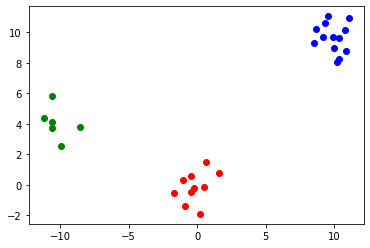

In [400]:
plot_dataset(data, classes)

KNN Implementation

In [401]:
class KNeighborClassifier:
    def __init__(self, k_neighbors: int = 5):
        self.k_neighbors = k_neighbors
        self.data: np.ndarray
        self.classes: np.ndarray
        self.num_classes: int
    
    def kneighbors(self, data: np.ndarray):
        distances = np.zeros((len(data), len(self.data)), dtype=np.float)
        for j, sample in enumerate(data):
            for k, x_i in enumerate(self.data):
                distances[j][k] = self._distance(sample, x_i)
                
        closest_idx = np.argsort(distances[:])
        kneighbors_idx = closest_idx[:, :self.k_neighbors]
        return kneighbors_idx
    
    def _distance(self, p1: np.ndarray, p2: np.ndarray):
        deltaX = np.abs(p2[0]-p1[0])
        deltaY = np.abs(p2[1]-p1[1])
        distance = math.pow(deltaX, 2) + math.pow(deltaY, 2)
        return math.sqrt(distance)
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.data = X
        self.classes = y
        self.num_classes = len(np.unique(y))
        
    def _count_classes(self, kneighbors_idx):
        counts = np.zeros(self.num_classes)
        neighbor_classes = self.classes[kneighbors_idx]
        for nclass in neighbor_classes:
            counts[nclass] += 1
        return np.argmax(counts)
    
    def predict(self, data: np.ndarray):
        neighbors_idxs = self.kneighbors(data)
        predictions = np.array([self._count_classes(idx) for idx in neighbors_idxs])
        return predictions
    
    def score(self, data: np.ndarray, classes: np.ndarray):
        class_pred = self.predict(data)
        accuracy = np.mean(class_pred == classes)
        return accuracy
        
        

In [402]:
data_test = np.array(
    [[0.0, 4.0],
    [-5.0, 4.0],
    [4.0, 6.0]]
)
classes_test = np.array(
    [0, 1, 2]
)

In [403]:
clf = KNeighborClassifier(k_neighbors=5)
clf.fit(data, classes)

prediction = clf.predict(data_test)
accuracy = clf.score(data_test, classes_test)

print(f"test data:\n{data_test}")
print(f"test classes:\n{classes_test}")
print(f"class pred:\n{prediction}")
print(f"accuracy:\n{accuracy*100}%")

test data:
[[ 0.  4.]
 [-5.  4.]
 [ 4.  6.]]
test classes:
[0 1 2]
class pred:
[0 1 2]
accuracy:
100.0%


In [404]:
def plot_knn_predictions(clf: KNeighborClassifier, samples: np.ndarray, preds: np.ndarray):
    # class:    0       1       2
    colors = ["red", "green", "blue"]
    for index, point in enumerate(clf.data):
        classIdx = clf.classes[index]
        plot.scatter(point[0], point[1], color=colors[classIdx])
        
    neighbors_idxs = clf.kneighbors(samples)

    for index, point in enumerate(samples):
        neighbors_points = clf.data[neighbors_idxs][index]
        neighbors_classes = clf.classes[neighbors_idxs][index]
        plot.scatter(point[0], point[1], color=colors[preds[index]], marker="*", s=100)
        for j, npoint in enumerate(neighbors_points):
            nclass = neighbors_classes[j]
            plot.plot((npoint[0], point[0]), (npoint[1], point[1]), color=colors[nclass])
    plot.show()

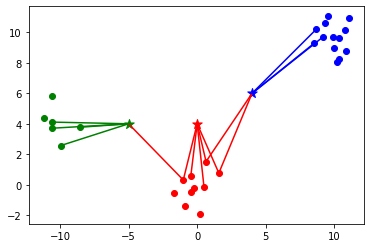

In [405]:
plot_knn_predictions(clf, data_test, prediction)